In [2]:
#based off of https://www.youtube.com/watch?v=8ZZDNd4eyVI video
#maybe symbolically solving will help us

In [3]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [4]:
#defining symbols in sympy
t, g = smp.symbols('t, g')
m1, m2 = smp.symbols('m1, m2')
L1, L2 = smp.symbols('L1, L2')
theta, phi = smp.symbols(r'\theta, \phi', cls=smp.Function)
theta = theta(t)
phi = phi(t)

In [5]:
#define derivatives
theta_d = smp.diff(theta, t)
phi_d = smp.diff(phi, t)
theta_dd = smp.diff(theta_d, t)
phi_dd = smp.diff(phi_d, t)

In [6]:
#define positions of masses
x1 = L1*smp.sin(theta)
y1 = -L1*smp.cos(theta)
x2 = x1 + L2*smp.sin(phi)
y2 = y1 - L2*smp.cos(phi)

In [7]:
#define energies of the masses
T1 = 1/2*m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2

V1 = m1 * g * y1
V2 = m2 * g * y2
V=V1+V2

L = T-V

In [8]:
#Develop ELeqns
ELeq1 = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t).simplify()
ELeq2 = smp.diff(L, phi) - smp.diff(smp.diff(L, phi_d), t).simplify()


In [9]:
#get solutions for the 2nd order ODEs via the ELeqns
sols = smp.solve ([ELeq1, ELeq2], (theta_dd, phi_dd), simplify=False, rational=False)

In [10]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,theta,phi,theta_d,phi_d), sols[theta_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,theta,phi,theta_d,phi_d), sols[phi_dd])
dthdt_f = smp.lambdify(theta_d, theta_d)
dphdt_f = smp.lambdify(phi_d, phi_d)

In [11]:
#define S vector
#S is a function of theta, theta_d, phi, phi_d
def dSdt(S,t,g,m1,m2,L1,L2):
    theta, theta_d, phi, phi_d = S
    return [
        dthdt_f(theta_d), 
        dz1dt_f(t,g,m1,m2,L1,L2,theta,phi,theta_d,phi_d),
        dphdt_f(phi_d),
        dz2dt_f(t,g,m1,m2,L1,L2,theta,phi,theta_d,phi_d),
        ]

In [21]:
t = np.linspace(0, 1000)
g = 9.81
m1=10
m2=1
L1 = 1 #keep L1=L2
L2 = 1 #keep L1=L2
ans = odeint(dSdt, y0=[-np.pi/12, 0, np.pi/12, 0], t=t, args=(g, m1, m2, L1, L2))

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [22]:
theta = ans.T[0]
v_theta = ans.T[1]
phi = ans.T[2]
v_phi = ans.T[3]

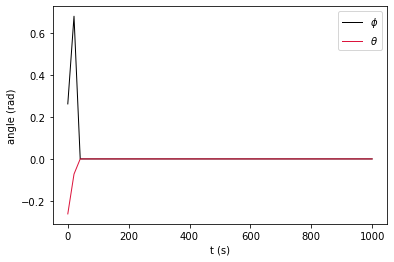

In [23]:
plt.plot(t, phi, c='black', lw=1)
plt.plot(t, theta, c='crimson', lw=1)
plt.xlabel('t (s)')
plt.ylabel('angle (rad)')
plt.legend((r'$\phi$', r'$\theta$'))
plt.show()